In [8]:
import sys
sys.path.append('../src/')
from rdr import RDR

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

pd.options.display.max_columns = None
pd.options.display.max_rows = None

from sklearn.tree import DecisionTreeClassifier

In [10]:
df = pd.read_csv("../data/orientate-master-sample_datasets/dental_implant_failure.csv")
display(df.head())
display(df.info())
display(df.isnull().sum())

,Age,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Departments,Surgeon experience,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Fixture length,Fixture width,Types of prosthesis,Angle of abutment,Prosthesis fixation,Dental implant failure
0,69.0,0,0.0,2.0,0.0,0.0,0.0,1.0,5.0,4,2.0,2.0,1.0,0.0,0,10.0,4.1,0.0,0.0,0.0,1
1,42.0,0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,1,3.0,1.0,1.0,0.0,0,12.0,4.1,0.0,0.0,0.0,1
2,43.0,0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,4,2.0,2.0,1.0,0.0,0,10.0,3.3,0.0,0.0,0.0,1
3,43.0,0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,5,2.0,2.0,1.0,0.0,0,8.0,4.1,0.0,0.0,0.0,1
4,43.0,0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,5,2.0,2.0,1.0,0.0,0,10.0,4.1,0.0,0.0,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           739 non-null    float64
 1   Gender                        747 non-null    int64  
 2   Systemic disease              741 non-null    float64
 3   Factors of missing            741 non-null    float64
 4   Tobacco smoking               719 non-null    float64
 5   Betel nut Chewing             719 non-null    float64
 6   Alcohol consumption           719 non-null    float64
 7   Departments                   744 non-null    float64
 8   Surgeon experience            744 non-null    float64
 9   Location of implant           747 non-null    int64  
 10  Bone density                  743 non-null    float64
 11  Timing of implant placement   740 non-null    float64
 12  Ridge augmentation            732 non-null    float64
 13  Maxil

None

Age                              8
Gender                           0
Systemic disease                 6
Factors of missing               6
Tobacco smoking                 28
Betel nut Chewing               28
Alcohol consumption             28
Departments                      3
Surgeon experience               3
Location of implant              0
Bone density                     4
Timing of implant placement      7
Ridge augmentation              15
Maxillary sinus augmentation    15
Implant system                   0
Fixture length                   3
Fixture width                    3
Types of prosthesis              4
Angle of abutment                9
Prosthesis fixation              6
Dental implant failure           0
dtype: int64

In [11]:
df.dropna(inplace=True)
display(df.info())
label = df['Dental implant failure']
features = df.drop('Dental implant failure', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 746
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           700 non-null    float64
 1   Gender                        700 non-null    int64  
 2   Systemic disease              700 non-null    float64
 3   Factors of missing            700 non-null    float64
 4   Tobacco smoking               700 non-null    float64
 5   Betel nut Chewing             700 non-null    float64
 6   Alcohol consumption           700 non-null    float64
 7   Departments                   700 non-null    float64
 8   Surgeon experience            700 non-null    float64
 9   Location of implant           700 non-null    int64  
 10  Bone density                  700 non-null    float64
 11  Timing of implant placement   700 non-null    float64
 12  Ridge augmentation            700 non-null    float64
 13  Maxillary 

None

In [12]:
cat = [
"Gender",
"Systemic disease",
"Factors of missing",
"Tobacco smoking",
"Betel nut Chewing",
"Alcohol consumption",
"Departments",
"Location of implant",
"Bone density",
"Timing of implant placement",
"Ridge augmentation",
"Maxillary sinus augmentation",
"Implant system",
"Types of prosthesis",
"Angle of abutment",
"Prosthesis fixation"]

rdr = RDR(
        antecedent="1",
        categorical_attr=cat,
        total_precedent= 1,
        spe_operator={"Surgeon experience" : ">="}
        )

In [13]:
# CREATE AND TRAIN DECISION TREE CLASSIFIER
dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train)

# CREATE PREDICTION DATASET - USING ALL DATA IN DATASET
prediction_dataset = dtf.predict(features)

# CREATE AND TRAIN RDR MODEL
dtf_rdr = rdr.fit(features, pd.DataFrame(prediction_dataset))

# PREDICT USING DECISION TREE AND RDR
dtf_pred = dtf.predict(X_test)
dtf_rdr_pred = dtf_rdr.predict(X_test)

print(metrics.accuracy_score(y_test,dtf_pred))
print(metrics.accuracy_score(y_test, dtf_rdr_pred))
print(metrics.accuracy_score(dtf_pred, dtf_rdr_pred))

0.7928571428571428
0.7357142857142858
0.8857142857142857


In [15]:
X_test.iloc[22]

Age                             61.0
Gender                           0.0
Systemic disease                 1.0
Factors of missing               2.0
Tobacco smoking                  0.0
Betel nut Chewing                0.0
Alcohol consumption              0.0
Departments                      0.0
Surgeon experience              21.0
Location of implant              5.0
Bone density                     2.0
Timing of implant placement      2.0
Ridge augmentation               0.0
Maxillary sinus augmentation     0.0
Implant system                   1.0
Fixture length                   9.5
Fixture width                    4.5
Types of prosthesis              0.0
Angle of abutment                0.0
Prosthesis fixation              0.0
Name: 575, dtype: float64

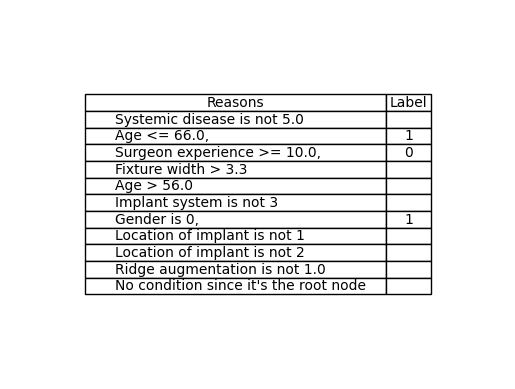

Prediction: 1
Reason: {'Age': 66.0}
Cornerstone: {'Age': 66.0, 'Gender': 0, 'Systemic disease': 1.0, 'Factors of missing': 2.0, 'Tobacco smoking': 0.0, 'Betel nut Chewing': 0.0, 'Alcohol consumption': 0.0, 'Departments': 2.0, 'Surgeon experience': 10.0, 'Location of implant': 4, 'Bone density': 2.0, 'Timing of implant placement': 2.0, 'Ridge augmentation': 0.0, 'Maxillary sinus augmentation': 0.0, 'Implant system': 0, 'Fixture length': 10.0, 'Fixture width': 4.8, 'Types of prosthesis': 0.0, 'Angle of abutment': 0.0, 'Prosthesis fixation': 0.0}


In [14]:
# print(X_test.iloc[22])
output, reason, cornerstone = rdr.explain_instance(X_test.iloc[22])
print(f'Prediction: {output}')
print(f'Reason: {reason}')
print(f'Cornerstone: {cornerstone}')

In [ ]:
mappings = {
    "Gender": {0: "female", 1: "male"},
    "Systemic disease": {
        0: "Healthy", 1: "Cardiovascular disorder", 2: "Diabetes",
        3: "Osteoporosis", 4: "Radiotherapy", 5: "Others"
    },
    "Factors of missing": {
        0: "Congenital missing", 1: "Caries", 2: "Periodontitis",
        3: "Fracture", 4: "Root resorption", 5: "Failure of endodontic treatment"
    },
    "Tobacco smoking": {0: "Never", 1: "Smoking", 2: "Stopped"},
    "Betel nut Chewing": {0: "Never", 1: "Chewing", 2: "Stopped"},
    "Alcohol consumption": {0: "Never", 1: "Drinking", 2: "Stopped"},
    "Departments": {0: "General practice", 1: "Periodontics", 2: "Oral-Maxillar surgery"},
    "Location of implant": {
        0: "Maxillary anterior teeth", 1: "Maxillary premolars", 2: "Maxillary molar",
        3: "Mandibular anterior teeth", 4: "Mandibular premolars", 5: "Mandibular molars"
    },
    "Bone density": {1: "Type I", 2: "Type II", 3: "Type III", 4: "Type IV"},
    "Timing of implant placement": {
        1: "Immediate implant placement", 2: "Early implant placement", 3: "Staged implant placement"
    },
    "Ridge augmentation": {0: "None", 1: "Guided bone regeneration", 2: "Ridge splitting"},
    "Maxillary sinus augmentation": {
        0: "None", 1: "Lateral window technique", 2: "Osteotome technique"
    },
    "Implant system": {
        0: "Straumann", 1: "Ankylos", 2: "XIVE", 3: "Nobeactive", 4: "Branemark", 5: "Lifecore"
    },
    "Types of prosthesis": {0: "Fixed denture", 1: "Overdenture"},
    "Angle of abutment": {0: "Without angle", 1: "With angle"},
    "Prosthesis fixation": {0: "Cement-retained", 1: "Screw-retained"},
    "Dental implant failure": {0: "Yes", 1: "No"}
}

# define all attributes as object type to ensure compatibility with string replacements
df = df.astype(object)

# apply mapping
for column, mapping in mappings.items():
    df.loc[:, column] = df[column].replace(mapping)